# Unsupervised Capstone Project
# Goal: Build an unsupervised model that will classify authors based on the style of writing using natural language processing.
 

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 100)

# Define functions to clean, lemmatize and process the text file as a string.

In [16]:
#This function expects a raw string. The purpose of this function is to take the string
#text and remove double dashes, punctuactions and special characters.
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    #text = re.sub(r'[\r|\n|\r\n]+', "", text)
    text = re.sub('[^a-zA-z0-9\s]', "", text)
    text = ' '.join(text.split())
    return text

In [17]:
#define a function to lemmatize the list
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
#nlp = spacy.load('en', parse = False, tag=False, entity=False)


#create a function to lemmatize the text in the combine list
def lemmatizestring(text):

    lmtzr = WordNetLemmatizer()

    return(" ".join([lmtzr.lemmatize(word) for word in word_tokenize(text)]))
    
    #using the following line of code creates a [E088] Text of length 1166183 exceeds maximum of 1000000.
    #text = nlp(text)
    #text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    #return text

In [18]:
#The function will take a raw text string and tokenize the words for given number. 
#For example, if the function is given a raw text string and the 100 as input parameters
#it will create 100 tokenized words store it in a list and repeat the process. The result 
#will be multiple lists equal to the num_of_words parametar.
#The purpose of this function is create a list of words that can be passed as input parameters 
#to our tfidf function that is used to create featurs.

def chunck_words(text,num_of_words):

    text = text.split(' ') #split on whitespace creates a token
    results = []
    res = []
    for word in text:
        res.append(word)
        if len(res)==num_of_words:
            results.append(" ".join(res))
            res = []
    results.append(" ".join(res))
    return(results)

# Import text files in string format from ten different authors/sources. Execute functions to clean, lemmatize and process the files. 

In [19]:
#load in the documents from nltk in a raw string 
#gutenberg.raw
#:return: the given file(s) as a single string.
#:rtype: str
caesar_raw_string = gutenberg.raw('shakespeare-caesar.txt')
hamlet_raw_string = gutenberg.raw('shakespeare-hamlet.txt')
macbeth_raw_string = gutenberg.raw('shakespeare-macbeth.txt')
ball_raw_string = gutenberg.raw('chesterton-ball.txt')
brown_raw_string = gutenberg.raw('chesterton-brown.txt')
thursday_raw_string = gutenberg.raw('chesterton-thursday.txt')
moby_dick_raw_string = gutenberg.raw('melville-moby_dick.txt')
bryant_raw_string = gutenberg.raw('bryant-stories.txt')
leaves_raw_string = gutenberg.raw('whitman-leaves.txt')
busterbrown_raw_string = gutenberg.raw('burgess-busterbrown.txt')

In [20]:
#Clean the raw file loaded as a string and print the output
caesar_cleaned_text = text_cleaner(caesar_raw_string)
hamlet_cleaned_text = text_cleaner(hamlet_raw_string)
macbeth_cleaned_text = text_cleaner(macbeth_raw_string)
ball_cleaned_text = text_cleaner(ball_raw_string)
brown_cleaned_text = text_cleaner(brown_raw_string)
thursday_cleaned_text = text_cleaner(thursday_raw_string)
moby_dick_cleaned_text = text_cleaner(moby_dick_raw_string)
bryant_cleaned_text = text_cleaner(bryant_raw_string)
leaves_cleaned_text = text_cleaner(leaves_raw_string)
busterbrown_cleaned_text = text_cleaner(busterbrown_raw_string)

In [21]:
#Lemmatize the file to show the root words
caesar_lemmatize_text = lemmatizestring(caesar_cleaned_text)
hamlet_lemmatize_text = lemmatizestring(hamlet_cleaned_text)
macbeth_lemmatize_text = lemmatizestring(macbeth_cleaned_text)
ball_lemmatize_text = lemmatizestring(ball_cleaned_text)
brown_lemmatize_text = lemmatizestring(brown_cleaned_text)
thursday_lemmatize_text = lemmatizestring(thursday_cleaned_text)
moby_dick_lemmatize_text = lemmatizestring(moby_dick_cleaned_text)
bryant_lemmatize_text = lemmatizestring(bryant_cleaned_text)
leaves_lemmatize_text = lemmatizestring(leaves_cleaned_text)
busterbrown_lemmatize_text = lemmatizestring(busterbrown_cleaned_text)

In [22]:
#verify output of one file
#moby_dick_lemmatize_text

In [132]:
#take the raw string and tokenize it for 1000 words.
num_of_words = 1000
new_tokenized_list_caesar=chunck_words(caesar_lemmatize_text,num_of_words)
new_tokenized_list_hamlet=chunck_words(hamlet_lemmatize_text,num_of_words)
new_tokenized_list_macbeth=chunck_words(macbeth_lemmatize_text,num_of_words)
new_tokenized_list_ball=chunck_words(ball_lemmatize_text,num_of_words)
new_tokenized_list_brown=chunck_words(brown_lemmatize_text,num_of_words)
new_tokenized_list_thursday=chunck_words(thursday_lemmatize_text,num_of_words)
new_tokenized_list_moby_dick=chunck_words(moby_dick_lemmatize_text,num_of_words)
new_tokenized_list_bryant=chunck_words(bryant_lemmatize_text,num_of_words)
new_tokenized_list_leaves=chunck_words(leaves_lemmatize_text,num_of_words)
new_tokenized_list_busterbrown=chunck_words(busterbrown_lemmatize_text,num_of_words)


In [133]:
#verify output of one file
#new_tokenized_list_macbeth

# After all files have been imported, cleaned and process then identify the lenght of each file and combine them into one file. Create a y vector that contains the aurthor/source name of each file. 

In [134]:
#Print the lengths of the tokenized list, as this will help us later on verify if we 
#have the correct number of rows when we combine the files.
print('lenght of caesar: ',len(new_tokenized_list_caesar))
print('lenght of hamlet: ',len(new_tokenized_list_hamlet))
print('lenght of macbeth: ',len(new_tokenized_list_macbeth))
print('lenght of ball: ',len(new_tokenized_list_ball))
print('lenght of brown: ',len(new_tokenized_list_brown))
print('lenght of thursday: ',len(new_tokenized_list_thursday))
print('lenght of moby dick: ',len(new_tokenized_list_moby_dick))
print('lenght of bryant: ',len(new_tokenized_list_bryant))
print('lenght of leaves: ',len(new_tokenized_list_leaves))
print('lenght of busterbrown: ',len(new_tokenized_list_busterbrown))
print('total lenght is',len(new_tokenized_list_caesar)+
     len(new_tokenized_list_hamlet)+ len(new_tokenized_list_macbeth)
     +len(new_tokenized_list_ball)+len(new_tokenized_list_brown)+
     len(new_tokenized_list_thursday)+len(new_tokenized_list_moby_dick)+
     len(new_tokenized_list_bryant)+len(new_tokenized_list_leaves)+
     len(new_tokenized_list_busterbrown))

lenght of caesar:  21
lenght of hamlet:  30
lenght of macbeth:  18
lenght of ball:  82
lenght of brown:  72
lenght of thursday:  59
lenght of moby dick:  214
lenght of bryant:  47
lenght of leaves:  123
lenght of busterbrown:  16
total lenght is 682


In [135]:
#Combine the tokenized list and create the Y vector by adding the source name of the
#file
combine_tokenized_liststring = new_tokenized_list_caesar
print('combine tokenized length:',len(combine_tokenized_liststring))
y=['caesar'] * len(new_tokenized_list_caesar)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_hamlet)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['hamlet'] * len(new_tokenized_list_hamlet)
print('length of y is:',len(y))


combine_tokenized_liststring.extend(new_tokenized_list_macbeth)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['macbeth'] * len(new_tokenized_list_macbeth)
print('length of y is:',len(y))


combine_tokenized_liststring.extend(new_tokenized_list_ball)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['ball'] * len(new_tokenized_list_ball)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_brown)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['brown'] * len(new_tokenized_list_brown)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_thursday)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['thursday'] * len(new_tokenized_list_thursday)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_moby_dick)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['moby_dick'] * len(new_tokenized_list_moby_dick)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_bryant)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['bryant'] * len(new_tokenized_list_bryant)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_leaves)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['leaves'] * len(new_tokenized_list_leaves)
print('length of y is:',len(y))

combine_tokenized_liststring.extend(new_tokenized_list_busterbrown)
print('combine tokenized length:',len(combine_tokenized_liststring))
y+=['busterbrown'] * len(new_tokenized_list_busterbrown)
print('length of y is:',len(y))

combine tokenized length: 21
length of y is: 21
combine tokenized length: 51
length of y is: 51
combine tokenized length: 69
length of y is: 69
combine tokenized length: 151
length of y is: 151
combine tokenized length: 223
length of y is: 223
combine tokenized length: 282
length of y is: 282
combine tokenized length: 496
length of y is: 496
combine tokenized length: 543
length of y is: 543
combine tokenized length: 666
length of y is: 666
combine tokenized length: 682
length of y is: 682


In [136]:
#y[151]

In [137]:
#combine_tokenized_liststring[151]

In [138]:
np.unique(y)

array(['ball', 'brown', 'bryant', 'busterbrown', 'caesar', 'hamlet',
       'leaves', 'macbeth', 'moby_dick', 'thursday'], dtype='<U11')

In [139]:
#test = y[151]+ ' ' + combine_tokenized_liststring[151]
#test

# Generate Features

In [140]:
# load nltk's English stopwords as variable called 'stopwords' we will use this as a parameter
# in the CountVectorizer and TFIDF function
stopwords = nltk.corpus.stopwords.words('english')

In [141]:
#Use tfitd to create our features
#tf-idf gives is how important a word is to a document
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=3, # only use words that appear at least twice
                             stop_words=stopwords, 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
tfidf=vectorizer.fit_transform(combine_tokenized_liststring)
terms = vectorizer.get_feature_names()
X_tfidf = pd.DataFrame(data=tfidf.toarray(),
             columns=terms)
X_tfidf.head()

#define the test/train split set.
from sklearn.model_selection import train_test_split

Y = y
X = X_tfidf
#X = combine_tokenized_liststring

#Let's train/test with 75% of our data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [142]:
X_tfidf.shape

(682, 12088)

In [143]:
len(y_test)

171

In [144]:
len(y_train)

511

In [145]:
#y_train

In [146]:
len(X_train)

511

In [147]:
#define function to get the top features
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [148]:
#print the top 20 features and their tf-idf score
#features = vect.get_feature_names()
#print(top_feats_in_doc(tfidf,terms, 1, 20))

In [149]:
#returing the top terms out of the features
def top_mean_feats(X, features,
 grp_ids=None, min_tfidf=0.5, top_n=20):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [150]:
#print the top 20 features
#print(top_mean_feats(tfidf,terms, top_n=20))

# Generate clusters for K-means,MeanShift,SpectralClustering and AffinityPropagation

Top terms per cluster:
Cluster 0:
Terms: caesar
Terms: brutus
Terms: bru
Terms: cassi
Terms: haue
Terms: cassius
Terms: cask
Terms: caes
Terms: antony
Terms: brut


Cluster 1:
Terms: buster
Terms: brown
Terms: father
Terms: flambeau
Terms: joe
Terms: bear
Terms: priest
Terms: dont
Terms: browns
Terms: think


Cluster 2:
Terms: ahab
Terms: ye
Terms: whale
Terms: captain
Terms: thou
Terms: ship
Terms: starbuck
Terms: sir
Terms: stubb
Terms: aye


Cluster 3:
Terms: fir
Terms: door
Terms: michael
Terms: seemed
Terms: cross
Terms: looked
Terms: came
Terms: street
Terms: tree
Terms: room


Cluster 4:
Terms: turnbull
Terms: macian
Terms: evan
Terms: quite
Terms: wall
Terms: sword
Terms: god
Terms: mean
Terms: garden
Terms: really


Cluster 5:
Terms: whale
Terms: sperm
Terms: leviathan
Terms: oil
Terms: whales
Terms: sea
Terms: whaling
Terms: spout
Terms: greenland
Terms: chapter


Cluster 6:
Terms: whale
Terms: boat
Terms: ship
Terms: queequeg
Terms: stubb
Terms: sea
Terms: captain
Terms: aha

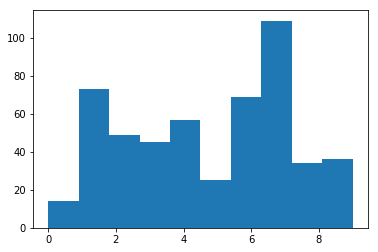

In [206]:
from sklearn.cluster import KMeans
n_clusters = 10
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train)
pred = model.predict(X_train) 

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print('Terms: %s' % terms[ind])
    #for ind, y_train in zip(order_centroids[i, :10], resultSet):
        #print('Terms: %s    Authours: %d' % (terms[ind], resultSet))
    #print

    print("\n")
print("Prediction")

#print(pd.crosstab(y_train, pred, margins=True, margins_name="Total"))


plt.hist(model.labels_, bins=n_clusters)
plt.show()


In [207]:
#y_train

In [204]:
type(pred)

numpy.ndarray

In [205]:
type(y_train)

list

In [200]:
pred.shape

(511,)

In [202]:
len(y_train)

511

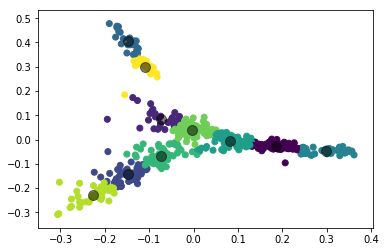

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,


In [190]:
#k-means with PCA
from sklearn.cluster import KMeans


# Normalize the data.
X_norm = normalize(X_train)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
km = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit(X_pca)
y_pred = km.fit_predict(X_pca)
#y_pred = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit_predict(X_train)
labels = km.labels_

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

centers =km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

#create a result table
data = [{'Cluster':'K-Means', 'Number of clusters': n_clusters, 'RI Score': '',
         'RI adjusted score': ''}]
df_results = pd.DataFrame(data)

df_results

#The model has a cluster centers attribute that returns the coordinates of each of the 
#k cluster centroids. Each token in the vectorizer we created earlier has a dimension or 
#coordinate in the centroid and represents its relative frequency within that cluster. 
#So to find the words with the highest frequency in a cluster, we have to locate the 
#indices of the highest values of the centroid, which then correspond to the indices of 
#the tokens in the vectorizer. Therefore, below are the top ten frequented words in 
#each cluster for K-Means


#common_words = y_pred.cluster_centers_.argsort()[:,-1:-11:-1]
#for num, centroid in enumerate(common_words):
#    print(str(num) + ' : ' + ', '.join(terms[word] for word in centroid))

In [153]:
X_pca.shape

(511, 2)

Number of estimated clusters: 8


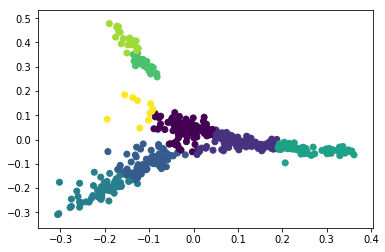

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,


In [154]:
#mean shift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.1, n_samples=X_tfidf.shape[0])


# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_pca)
ms_pred = ms.fit_predict(X_pca)
#ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
#print ("Labels identified: {}".format(labels)) # dosn't tell me much as it is just numbers

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

#update result table
data = [{'Cluster':'MeanShift', 'Number of clusters': n_clusters_, 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results


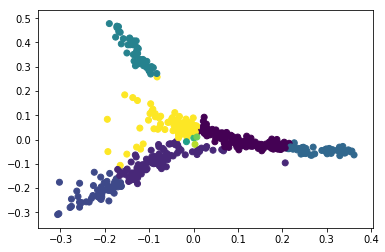

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,
0,SpectralClustering,10,,


In [155]:
#apectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)
sc_pred = sc.fit_predict(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()

#update result table
data = [{'Cluster':'SpectralClustering', 'Number of clusters': n_clusters, 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

In [156]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_pca)
af_pred = af.fit_predict(X_pca)
#print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

#update result table
data = [{'Cluster':'AffinityPropagation', 'Number of clusters': len(cluster_centers_indices), 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

Estimated number of clusters: 14


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,
0,SpectralClustering,10,,
0,AffinityPropagation,14,,


In [157]:
#reset the index so that I can update the RI and adjusted score later.
df_results = df_results.reset_index(drop=True)
df_results

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
1,MeanShift,8,,
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


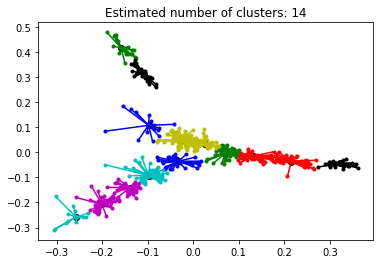

In [158]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_pca[cluster_centers_indices[k]]
    plt.plot(X_pca[class_members, 0], X_pca[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Evaluate the accurcy for each of the clusters

In [159]:
# Note: the itertools module is tons of fun and very useful.
from sklearn.metrics import silhouette_score
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.

#y_pred = k-means
c = list(itertools.product(y, y_pred))

print("this is the product of y and y_pred:",c[21])

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
print("The RIcounts are:", RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
#RI score is the ratio of the number of pairs where the ground truth and the new solution 
#agree, over the total number of pairs.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print("The RIscore is:", RIscore)

from sklearn import metrics

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, y_pred)
print("The adjusted rand score is:",RIadjusted )
#print('Silhouette Score: {:0.7}'.format(silhouette_score(X, y_pred, metric='euclidean')))

#update the result table with the RI score and adjust score
df_results.loc[[0],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

this is the product of y and y_pred: ('caesar', 2)
The RIcounts are: [[('hamlet', 5), 750], [('leaves', 6), 7011], [('thursday', 2), 3776], [('macbeth', 5), 450], [('bryant', 0), 4653], [('moby_dick', 1), 8346], [('brown', 3), 1872], [('ball', 2), 5248], [('thursday', 8), 1652], [('leaves', 5), 3075], [('macbeth', 6), 1026], [('bryant', 5), 1175], [('caesar', 7), 1386], [('brown', 9), 3744], [('moby_dick', 4), 11770], [('brown', 4), 3960], [('ball', 1), 3198], [('leaves', 0), 12177], [('busterbrown', 0), 1584], [('bryant', 6), 2679], [('caesar', 0), 2079], [('moby_dick', 7), 14124], [('hamlet', 1), 1170], [('thursday', 6), 3363], [('macbeth', 1), 702], [('busterbrown', 5), 400], [('ball', 6), 4674], [('hamlet', 4), 1650], [('leaves', 9), 6396], [('thursday', 1), 2301], [('macbeth', 2), 1152], [('busterbrown', 6), 912], [('bryant', 1), 1833], [('moby_dick', 0), 21186], [('brown', 0), 7128], [('ball', 5), 2050], [('hamlet', 7), 1980], [('leaves', 4), 6765], [('macbeth', 7), 1188], [('bry

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0121262,0.475394
1,MeanShift,8,,
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


In [160]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = mean shift
c = list(itertools.product(y, ms_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, ms_pred)
print("The adjusted rand score is:",RIadjusted)


#update the result table with the RI score and adjust score
df_results.loc[[1],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

[[('bryant', 7), 470], [('caesar', 1), 2436], [('busterbrown', 5), 432], [('hamlet', 5), 810], [('ball', 3), 4592], [('leaves', 6), 2583], [('thursday', 2), 4720], [('moby_dick', 6), 4494], [('macbeth', 5), 486], [('brown', 6), 1512], [('bryant', 0), 6204], [('leaves', 2), 9840], [('hamlet', 0), 3960], [('ball', 6), 1722], [('moby_dick', 2), 17120], [('thursday', 5), 1593], [('moby_dick', 1), 24824], [('brown', 3), 4032], [('bryant', 4), 3243], [('caesar', 6), 441], [('busterbrown', 2), 1280], [('hamlet', 4), 2070], [('ball', 2), 6560], [('thursday', 1), 6844], [('moby_dick', 5), 5778], [('macbeth', 2), 1440], [('brown', 7), 720], [('caesar', 2), 1680], [('busterbrown', 6), 336], [('bryant', 1), 5452], [('leaves', 5), 3321], [('macbeth', 6), 378], [('thursday', 4), 4071], [('moby_dick', 0), 28248], [('brown', 0), 9504], [('bryant', 5), 1269], [('leaves', 1), 14268], [('caesar', 7), 210], [('busterbrown', 3), 896], [('hamlet', 3), 1680], [('ball', 5), 2214], [('thursday', 0), 7788], [('

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0121262,0.475394
1,MeanShift,8,0.00356382,0.465032
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


In [161]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = spectural clustering
c = list(itertools.product(y, sc_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, sc_pred)
print("The adjusted rand score is:",RIadjusted)


#update the result table with the RI score and adjust score
df_results.loc[[2],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

[[('hamlet', 5), 30], [('leaves', 6), 5781], [('thursday', 2), 2537], [('macbeth', 5), 18], [('bryant', 0), 4794], [('moby_dick', 1), 23754], [('brown', 3), 72], [('ball', 2), 3526], [('thursday', 8), 59], [('leaves', 5), 123], [('macbeth', 6), 846], [('bryant', 5), 47], [('caesar', 7), 3192], [('brown', 9), 72], [('moby_dick', 4), 11128], [('brown', 4), 3744], [('ball', 1), 9102], [('leaves', 0), 12546], [('busterbrown', 0), 1632], [('bryant', 6), 2209], [('caesar', 0), 2142], [('moby_dick', 7), 32528], [('hamlet', 1), 3330], [('thursday', 6), 2773], [('macbeth', 1), 1998], [('busterbrown', 5), 16], [('ball', 6), 3854], [('hamlet', 4), 1560], [('leaves', 9), 123], [('thursday', 1), 6549], [('macbeth', 2), 774], [('busterbrown', 6), 752], [('bryant', 1), 5217], [('moby_dick', 0), 21828], [('brown', 0), 7344], [('ball', 5), 82], [('hamlet', 7), 4560], [('leaves', 4), 6396], [('macbeth', 7), 2736], [('bryant', 2), 2021], [('caesar', 4), 1092], [('moby_dick', 3), 214], [('brown', 5), 72],

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0121262,0.475394
1,MeanShift,8,0.00356382,0.465032
2,SpectralClustering,10,0.00733138,0.492689
3,AffinityPropagation,14,,


In [162]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = affinity propergation
c = list(itertools.product(y, af_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, af_pred)
print("The adjusted rand score is:",RIadjusted)

#update the result table with the RI score and adjust score
df_results.loc[[3],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

[[('thursday', 13), 1652], [('hamlet', 5), 1200], [('leaves', 6), 3075], [('busterbrown', 10), 720], [('thursday', 2), 3009], [('macbeth', 5), 720], [('bryant', 0), 1316], [('caesar', 10), 945], [('moby_dick', 1), 10272], [('brown', 3), 1008], [('ball', 2), 4182], [('hamlet', 11), 1050], [('thursday', 8), 1180], [('leaves', 5), 4920], [('macbeth', 6), 450], [('bryant', 5), 1880], [('caesar', 7), 357], [('brown', 9), 3672], [('moby_dick', 4), 6634], [('ball', 12), 6396], [('brown', 4), 2232], [('ball', 1), 3936], [('thursday', 11), 2065], [('leaves', 0), 3444], [('busterbrown', 0), 448], [('macbeth', 11), 630], [('caesar', 13), 588], [('bryant', 6), 1175], [('moby_dick', 10), 9630], [('caesar', 0), 588], [('brown', 10), 3240], [('moby_dick', 7), 3638], [('ball', 11), 2870], [('hamlet', 1), 1440], [('leaves', 10), 5535], [('thursday', 6), 1475], [('macbeth', 1), 864], [('busterbrown', 5), 640], [('macbeth', 12), 1404], [('bryant', 11), 1645], [('moby_dick', 13), 5992], [('ball', 6), 2050

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0121262,0.475394
1,MeanShift,8,0.00356382,0.465032
2,SpectralClustering,10,0.00733138,0.492689
3,AffinityPropagation,14,0.0108895,0.384924


In [163]:
# In summation based on my results table none of my clusters are predicting a 100% agreement
# between my ground truth and my solution but MeanShift is the cluster that is predicting 
# the higher RI adjusted score and implies it is predicting the most accurate number of
# clusters. 

In [182]:
#Heat map use cluster label vs origial label 
#%of each source cluster togethers

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train,af.labels_)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_train,
            yticklabels=af.labels_)
plt.xlabel('true label')
plt.ylabel('predicted label');


ValueError: Mix of label input types (string and number)

# Generate Models

In [165]:
#my data is already in a train_test split file no need to do it again.

In [166]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=10)
train = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Training set score:', knn.score(X_train, y_train))
print('\nTest set score:', knn.score(X_test, y_test))
#print('\nTraining std score:', rfc (X_test, y_test))
#print('\nTest std score:', rfc.score(X_test, y_test))



#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(knn, X_train, y_train, cv=5)
cv_results_test = cross_val_score(knn, X_test, y_test, cv=5)
print('RFC Training mean set score:', cv_results_train.mean())
#print('RFC Training set score:', cv_results_train)
print('RFC Testing mean set score:', cv_results_test.mean())
#print('RFC Testing set score:', cv_results_test)



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

Training set score: 0.9882583170254403

Test set score: 0.9883040935672515


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RFC Training mean set score: 0.9786117517268057
RFC Testing mean set score: 0.9363743799727022
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  1 14  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       0.95      1.00      0.97        18
      bryant       1.00      0.88      0.93        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       1.00      1.00      1.00         9
      leaves       0.96      1.00      0.98        22
     macbeth       1.00      1.00      1.00         5
   moby_dick       1.00      1.00      1.00        56
    thursday       1.00      1.00

In [167]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.model_selection import train_test_split

svc = LinearSVC()
train = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Training set score:', svc.score(X_train, y_train))
print('\nTest set score:', svc.score(X_test, y_test))
#print('\nTraining std score:', rfc (X_test, y_test))
#print('\nTest std score:', rfc.score(X_test, y_test))



#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(svc, X_train, y_train, cv=5)
cv_results_test = cross_val_score(svc, X_test, y_test, cv=5)
print('RFC Training mean set score:', cv_results_train.mean())
#print('RFC Training set score:', cv_results_train)
print('RFC Testing mean set score:', cv_results_test.mean())
#print('RFC Testing set score:', cv_results_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

Training set score: 1.0

Test set score: 0.9941520467836257


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RFC Training mean set score: 0.9942846872753414
RFC Testing mean set score: 0.9827296736464819
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  1  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       1.00      1.00      1.00        18
      bryant       1.00      0.94      0.97        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       1.00      1.00      1.00         9
      leaves       1.00      1.00      1.00        22
     macbeth       1.00      1.00      1.00         5
   moby_dick       0.98      1.00      0.99        56
    thursday       1.00      1.00

In [168]:
#Execute the RandomForestClassifier Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
train = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
#print('\nTraining std score:', rfc (X_test, y_test))
#print('\nTest std score:', rfc.score(X_test, y_test))



#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(rfc, X_train, y_train, cv=5)
cv_results_test = cross_val_score(rfc, X_test, y_test, cv=5)
print('RFC Training mean set score:', cv_results_train.mean())
#print('RFC Training set score:', cv_results_train)
print('RFC Testing mean set score:', cv_results_test.mean())
#print('RFC Testing set score:', cv_results_test)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 

Training set score: 0.9980430528375733

Test set score: 0.7719298245614035


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RFC Training mean set score: 0.8258893129625433
RFC Testing mean set score: 0.6644469828112343
[[13  0  0  0  0  0  0  0  1  1]
 [ 6  8  1  0  0  0  1  0  1  1]
 [ 0  0  9  0  0  0  4  0  3  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  6  1  0  0  0  0]
 [ 0  0  0  0  1  8  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  1  0]
 [ 0  0  0  0  0  4  0  1  0  0]
 [ 1  0  0  0  0  0  1  0 54  0]
 [ 3  2  1  0  0  0  1  0  4  9]]
              precision    recall  f1-score   support

        ball       0.57      0.87      0.68        15
       brown       0.80      0.44      0.57        18
      bryant       0.82      0.56      0.67        16
 busterbrown       1.00      1.00      1.00         3
      caesar       0.86      0.86      0.86         7
      hamlet       0.62      0.89      0.73         9
      leaves       0.75      0.95      0.84        22
     macbeth       1.00      0.20      0.33         5
   moby_dick       0.84      0.96      0.90        56
    thursday       0.82      0.45

In [169]:
#Execute the LogisticRegression Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

#compare the training and testing results using cross validation
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(lr, X_train, y_train, cv=5)
cv_results_test = cross_val_score(lr, X_test, y_test, cv=5)
print('LR Training mean set score:', cv_results_train.mean())
#print('LR Training set score:', cv_results_train)
print('LR Testing mean set score:', cv_results_test.mean())

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 


Training set score: 0.9960861056751468

Test set score: 0.9298245614035088


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


LR Training mean set score: 0.9240892056625226
LR Testing mean set score: 0.5687751756050468
[[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  4  0  7  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  1  0  0 19]]
              precision    recall  f1-score   support

        ball       1.00      1.00      1.00        15
       brown       1.00      1.00      1.00        18
      bryant       1.00      0.31      0.48        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       1.00      1.00      1.00         9
      leaves       0.81      1.00      0.90        22
     macbeth       1.00      1.00      1.00         5
   moby_dick       0.89      1.00      0.94        56
    thursday       1.00      0.95  

In [170]:
#Execute the GradientBoostingClassifier Model
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(clf, X_train, y_train, cv=5)
cv_results_test = cross_val_score(clf, X_test, y_test, cv=5)
print('CLF Training mean set score:', cv_results_train.mean())
#print('CLF Training set score:', cv_results_train)
print('CLF Testing mean set score:', cv_results_test.mean())

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred)) 



Training set score: 1.0

Test set score: 0.9590643274853801


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CLF Training mean set score: 0.9412127233705159
CLF Testing mean set score: 0.8606254924154155
[[14  1  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  1  0  2  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  1  0]
 [ 0  1  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  1  0  0 55  0]
 [ 0  0  0  0  0  0  0  0  0 20]]
              precision    recall  f1-score   support

        ball       1.00      0.93      0.97        15
       brown       0.90      1.00      0.95        18
      bryant       1.00      0.81      0.90        16
 busterbrown       1.00      1.00      1.00         3
      caesar       1.00      1.00      1.00         7
      hamlet       0.89      0.89      0.89         9
      leaves       0.95      0.95      0.95        22
     macbeth       1.00      1.00      1.00         5
   moby_dick       0.95      0.98      0.96        56
    thursday       1.00      1.00